### Problem Statement

You are a data scientist / AI engineer working on a binary classification problem. You have been provided with a dataset named **`"social_network_ads.csv"`**, which includes information about users' age, gender, estimated salary, and whether they purchased a product or not. The dataset comprises the following columns:

- `user_id:` The unique identifier for each user.
- `gender:` The gender of the user.
- `age:` The age of the user.
- `estimated_salary:` The estimated salary of the user.
- `purchased:` Whether the user purchased the product or not (0 for No, 1 for Yes).
  
Your task is to use this dataset to build and evaluate a logistic regression model to predict whether a user will purchase the product based on their age, gender and estimated salary. You will also evaluate the model's performance using precision, recall, and other classification metrics.

**Dataset credits:** Akram (https://www.kaggle.com/datasets/akram24/social-network-ads)

**Import Necessary Libraries**

In [3]:
#Import Necessary Libraries
import pandas as pd

df = pd.read_csv("social_network_ads.csv")
df.head()

,user_id,gender,age,estimated_salary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.shape

(400, 5)

In [7]:
df.isna().sum()

user_id             0
gender              0
age                 0
estimated_salary    0
purchased           0
dtype: int64

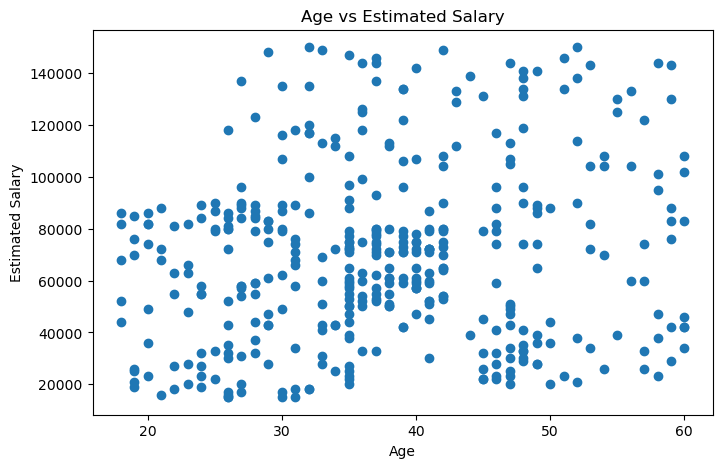

In [11]:
# Visualize the distribution of users' age and estimated salary using scatter plots.
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df["age"], df["estimated_salary"])

plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Age vs Estimated Salary")

plt.show()

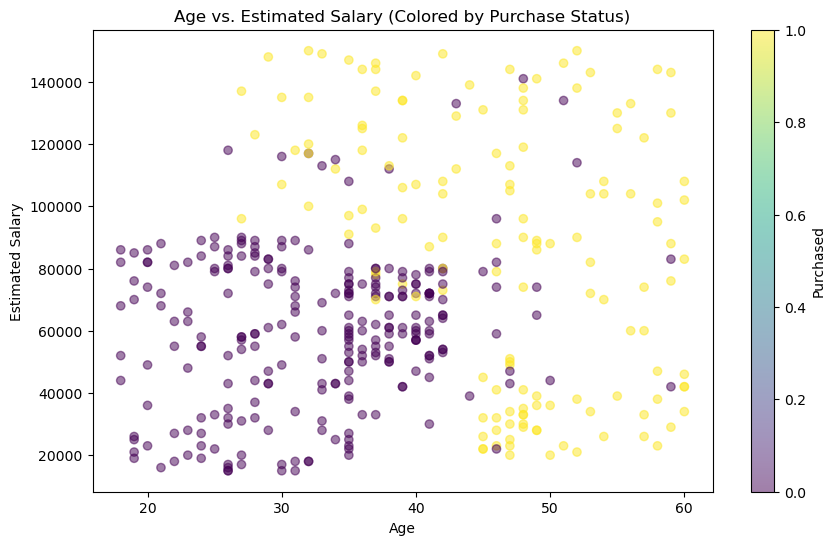

In [13]:
# Visualize the distribution of users' age and estimated salary using scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['estimated_salary'], c=df['purchased'], cmap='viridis', alpha=0.5)

# c=df['purchased']   Uses the 'purchased' column to color each point (0 or 1 usually).
# cmap='viridis'   Applies the 'viridis' colormap to give a nice gradient of colors based on the purchased value.
#  alpha=0.5       transparency for overlapping points     
#                   Sets transparency to 50% so overlapping points are easier to see.                  

                   
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Age vs. Estimated Salary (Colored by Purchase Status)')

plt.colorbar(label='Purchased')
# This line adds a color bar (legend) on the side of the plot.
# It helps you understand what the colors represent.
# Since you're coloring points by purchased 
# (likely 0 = No, 1 = Yes), the color bar shows that mapping.

plt.show()

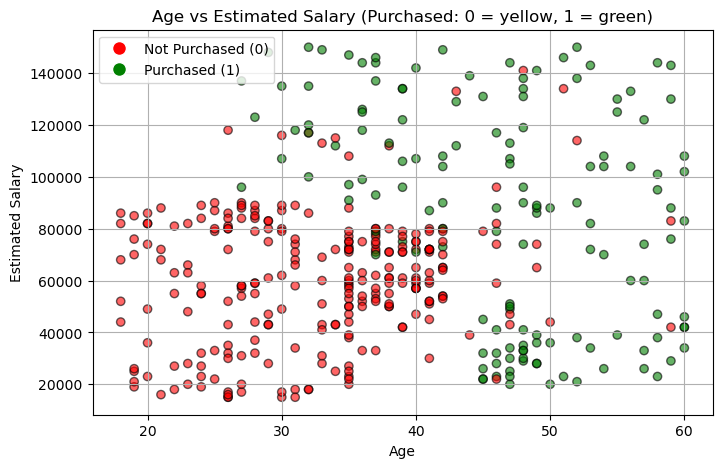

In [19]:
colors = df['purchased'].map({0: 'red', 1: 'green'})

plt.figure(figsize=(8, 5))
plt.scatter(
    df['age'], 
    df['estimated_salary'], 
    c=colors,                # apply discrete colors
    alpha=0.6,
    edgecolors='k'           # adds a black edge around bubbles (optional, looks nice!)
)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Age vs Estimated Salary (Purchased: 0 = yellow, 1 = green)")

# Optional: Add custom legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Not Purchased (0)', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Purchased (1)', markerfacecolor='green', markersize=10)
]
plt.legend(handles=legend_elements)

plt.grid(True)
plt.show()

In [21]:
# Encode the gender column (Male as 0 and Female as 1)
df["gender"] = df["gender"].apply(lambda x: 1 if x == "Male" else 0)
df.head()

,user_id,gender,age,estimated_salary,purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [25]:
df["gender"].value_counts()

gender
0    204
1    196
Name: count, dtype: int64

In [29]:
# Select the features and target variable for modeling
X = df.drop("purchased", axis=1)
y = df["purchased"]

In [31]:
# Split the data into training and test sets with a test size of 30%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Initialize and train a Logistic Regression model using the training data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
# Print the model's coefficients and intercept
model.coef_

array([[-6.95393249e-07, -2.55038555e-04,  1.97701862e-01,
         3.31181007e-05]])

In [39]:
model.intercept_

array([-9.78530038e-06])

In [41]:
#  Make predictions on the test set using the trained model
y_pred = model.predict(X_test)

In [45]:
# Evaluate the model using a classification report, including precision, recall, and accuracy metrics
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        73
           1       0.94      0.66      0.78        47

    accuracy                           0.85       120
   macro avg       0.88      0.82      0.83       120
weighted avg       0.86      0.85      0.84       120

